In [2]:
import pandas as pd
import numpy as np

# Import applications dataset
application_record = pd.read_csv("data/application_record.csv")
application_record.shape

(438557, 18)

In [3]:
# Remove Duplicates
application_record.drop_duplicates(subset ="ID", keep = False, inplace = True)

In [4]:
# Remove Y with 1 and N with 0
application_record['FLAG_OWN_CAR'] = np.where(application_record['FLAG_OWN_CAR'].eq('Y', 'N'), 1, 0)
application_record['FLAG_OWN_REALTY'] = np.where(application_record['FLAG_OWN_REALTY'].eq('Y', 'N'), 1, 0)

In [5]:
# Calculate age and working years
application_record['APPLICANT_AGE'] = round(-application_record['DAYS_BIRTH'] / 365)
application_record['YEARS_WORKING'] = round(-application_record['DAYS_EMPLOYED'] / 365)

In [6]:
# Remove applcations < 21 years old
application_record = application_record[application_record['APPLICANT_AGE'] >= 21]  

# Remove rows with null columns
application_record = application_record.dropna()

In [7]:
# Import credit record dataset
credit_record = pd.read_csv("data/credit_record.csv")
credit_record.shape

(1048575, 3)

In [8]:
mapz = {
    'C': 'Good Debt', # Loan paid on time
    'X': 'Good Debt', # No loan for the month
    '0': 'Good Debt', # Loan 1-29 days overdue
    '1': 'Bad Debt', # Loan 30-59 days overdue
    '2': 'Bad Debt', # Loan 60-89 days overdue
    '3': 'Bad Debt', # Loan 90-119 days overdue
    '4': 'Bad Debt', # Loan 120-149 days overdue
    '5': 'Bad Debt', # Loan > 150 days overdue
}
credit_record['STATUS_2'] = credit_record['STATUS'].map(mapz)

credit_record['TOTAL_GOOD_DEBT'] = np.where(credit_record['STATUS_2'].eq('Good Debt', 'Bad Debt'), 1, 0)
credit_record['TOTAL_BAD_DEBT'] = np.where(credit_record['STATUS_2'].eq('Good Debt', 'Bad Debt'), 0, 1)

df2 = credit_record.groupby('ID').sum()

df2['STATUS'] = np.where(df2['TOTAL_GOOD_DEBT'] >= df2['TOTAL_BAD_DEBT'], 1, 0)
df2 = df2.drop(columns=['MONTHS_BALANCE'])

df2['GOOD_PERCENT'] = np.where(df2['TOTAL_BAD_DEBT']!= 0, df2['TOTAL_GOOD_DEBT']/(df2['TOTAL_GOOD_DEBT']+df2['TOTAL_BAD_DEBT']), 1)


# Remove empty debt
df2 = df2.dropna()
df2.head()

,TOTAL_GOOD_DEBT,TOTAL_BAD_DEBT,STATUS,GOOD_PERCENT
ID,,,,
5001711,4,0,1,1.0
5001712,19,0,1,1.0
5001713,22,0,1,1.0
5001714,15,0,1,1.0
5001715,60,0,1,1.0


In [9]:
new_df = pd.merge(application_record, df2, on="ID")
new_df = new_df.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED'])
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICANT_AGE,YEARS_WORKING,TOTAL_GOOD_DEBT,TOTAL_BAD_DEBT,STATUS,GOOD_PERCENT
0,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2.0,59.0,3.0,30,0,1,1.0
1,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1.0,52.0,8.0,5,0,1,1.0
2,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1.0,52.0,8.0,5,0,1,1.0
3,5008810,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1.0,52.0,8.0,27,0,1,1.0
4,5008811,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1.0,52.0,8.0,39,0,1,1.0


In [10]:
new_df.to_csv('data/processed_data.csv', index=False)

In [160]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 0 to 25133
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   25134 non-null  int64  
 1   CODE_GENDER          25134 non-null  object 
 2   FLAG_OWN_CAR         25134 non-null  int32  
 3   FLAG_OWN_REALTY      25134 non-null  int32  
 4   CNT_CHILDREN         25134 non-null  int64  
 5   AMT_INCOME_TOTAL     25134 non-null  float64
 6   NAME_INCOME_TYPE     25134 non-null  object 
 7   NAME_EDUCATION_TYPE  25134 non-null  object 
 8   NAME_FAMILY_STATUS   25134 non-null  object 
 9   NAME_HOUSING_TYPE    25134 non-null  object 
 10  FLAG_MOBIL           25134 non-null  int64  
 11  FLAG_WORK_PHONE      25134 non-null  int64  
 12  FLAG_PHONE           25134 non-null  int64  
 13  FLAG_EMAIL           25134 non-null  int64  
 14  OCCUPATION_TYPE      25134 non-null  object 
 15  CNT_FAM_MEMBERS      25134 non-null 

In [36]:
#imbalance
countY, countX = new_df.STATUS.value_counts()
print("Ratio of classes is Y : N = ", countY, ":", countX)

Ratio of classes is Y : N =  25048 : 86


In [11]:
#convert to int
new_df = new_df.round(0).astype({"AMT_INCOME_TOTAL":"int","CNT_FAM_MEMBERS":"int","APPLICANT_AGE":"int","YEARS_WORKING":"int","GOOD_PERCENT":"int"})
new_df.info()
new_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 0 to 25133
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   25134 non-null  int64 
 1   CODE_GENDER          25134 non-null  object
 2   FLAG_OWN_CAR         25134 non-null  int32 
 3   FLAG_OWN_REALTY      25134 non-null  int32 
 4   CNT_CHILDREN         25134 non-null  int64 
 5   AMT_INCOME_TOTAL     25134 non-null  int32 
 6   NAME_INCOME_TYPE     25134 non-null  object
 7   NAME_EDUCATION_TYPE  25134 non-null  object
 8   NAME_FAMILY_STATUS   25134 non-null  object
 9   NAME_HOUSING_TYPE    25134 non-null  object
 10  FLAG_MOBIL           25134 non-null  int64 
 11  FLAG_WORK_PHONE      25134 non-null  int64 
 12  FLAG_PHONE           25134 non-null  int64 
 13  FLAG_EMAIL           25134 non-null  int64 
 14  OCCUPATION_TYPE      25134 non-null  object
 15  CNT_FAM_MEMBERS      25134 non-null  int32 
 16  APPL

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICANT_AGE,YEARS_WORKING,TOTAL_GOOD_DEBT,TOTAL_BAD_DEBT,STATUS,GOOD_PERCENT
0,5008806,M,1,1,0,112500,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2,59,3,30,0,1,1
1,5008808,F,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1,52,8,5,0,1,1
2,5008809,F,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1,52,8,5,0,1,1
3,5008810,F,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1,52,8,27,0,1,1
4,5008811,F,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1,52,8,39,0,1,1


In [39]:
#find best numeric variables
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def varacc(a,b):
    # Predict the Response corresponding to Predictors
    
    # Extract Response and Predictors
    y = pd.DataFrame(new_df[a])
    X = pd.DataFrame(new_df[b])

# Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
    dectree.fit(X_train, y_train)                    # train the decision tree model
    y_train_pred = dectree.predict(X_train)
    print("Train Data for " +  a)
    print("Accuracy  :\t", dectree.score(X_train, y_train))
    print()
    return 

#numeric vars
for col in new_df:
    if new_df[col].dtypes != "object":
        y = pd.DataFrame(new_df["STATUS"])
        X = pd.DataFrame(new_df[col])

    # Split the Dataset into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    # Decision Tree using Train Data
        dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
        dectree.fit(X_train, y_train)                    # train the decision tree model
        y_train_pred = dectree.predict(X_train)
        print("Train Data for " +  col)
        print("Accuracy  :\t", dectree.score(X_train, y_train))
        print()



Train Data for ID
Accuracy  :	 0.9968667628189188

Train Data for FLAG_OWN_CAR
Accuracy  :	 0.9967672949719003

Train Data for FLAG_OWN_REALTY
Accuracy  :	 0.9965683592778635

Train Data for CNT_CHILDREN
Accuracy  :	 0.9966678271248819

Train Data for AMT_INCOME_TOTAL
Accuracy  :	 0.9964688914308449

Train Data for FLAG_MOBIL
Accuracy  :	 0.9966678271248819

Train Data for FLAG_WORK_PHONE
Accuracy  :	 0.9967175610483912

Train Data for FLAG_PHONE
Accuracy  :	 0.9969662306659373

Train Data for FLAG_EMAIL
Accuracy  :	 0.9962202218132988

Train Data for CNT_FAM_MEMBERS
Accuracy  :	 0.9965186253543542

Train Data for APPLICANT_AGE
Accuracy  :	 0.9967672949719003

Train Data for YEARS_WORKING
Accuracy  :	 0.9965186253543542

Train Data for TOTAL_GOOD_DEBT
Accuracy  :	 0.9966678271248819

Train Data for TOTAL_BAD_DEBT
Accuracy  :	 0.9971651663599741

Train Data for STATUS
Accuracy  :	 1.0

Train Data for GOOD_PERCENT
Accuracy  :	 0.9987566519122694



In [41]:
non_int = ["ID","STATUS","TOTAL_GOOD_DEBT","TOTAL_BAD_DEBT"]
for col in new_df:
    if new_df[col].dtypes == "object":
        non_int.append(col)
x1 = new_df.drop(columns=non_int)
x1

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,APPLICANT_AGE,YEARS_WORKING,GOOD_PERCENT
0,1,1,0,112500,1,0,0,0,2,59,3,1
1,0,1,0,270000,1,0,1,1,1,52,8,1
2,0,1,0,270000,1,0,1,1,1,52,8,1
3,0,1,0,270000,1,0,1,1,1,52,8,1
4,0,1,0,270000,1,0,1,1,1,52,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25129,1,1,0,315000,1,0,0,0,2,48,7,1
25130,0,1,0,157500,1,0,1,1,2,34,4,0
25131,0,1,0,157500,1,0,1,1,2,34,4,0
25132,0,1,0,283500,1,0,0,0,2,49,2,1


In [42]:
import matplotlib.pyplot as plt 
import seaborn as sb
sb.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


non_int = ["ID","STATUS","TOTAL_GOOD_DEBT","TOTAL_BAD_DEBT"]
for col in new_df:
    if new_df[col].dtypes == "object":
        non_int.append(col)
x1 = new_df.drop(columns=non_int) 
y1 = pd.DataFrame(new_df['STATUS'])
#x1 =pd.DataFrame(new_df[[""]])
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size = 0.2)

dectree = DecisionTreeClassifier(max_depth = 2) # create the decision tree object
dectree.fit(X_train1, y_train1)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred1 = dectree.predict(X_train1)
y_test_pred1 = dectree.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train1, y_train1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test1, y_test1))
print()



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9988063858357786

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9978118161925602



<AxesSubplot:>

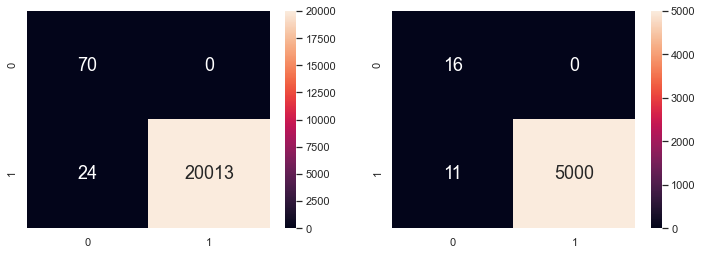

In [43]:

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(401.76000000000005, 543.6, 'GOOD_PERCENT <= 0.5\ngini = 0.007\nsamples = 20107\nvalue = [70, 20037]\nclass = Good'),
 Text(267.84000000000003, 326.16, 'YEARS_WORKING <= 2.5\ngini = 0.38\nsamples = 94\nvalue = [70, 24]\nclass = Bad'),
 Text(133.92000000000002, 108.72000000000003, 'gini = 0.26\nsamples = 39\nvalue = [33, 6]\nclass = Bad'),
 Text(401.76000000000005, 108.72000000000003, 'gini = 0.44\nsamples = 55\nvalue = [37, 18]\nclass = Bad'),
 Text(535.6800000000001, 326.16, 'gini = 0.0\nsamples = 20013\nvalue = [0, 20013]\nclass = Good')]

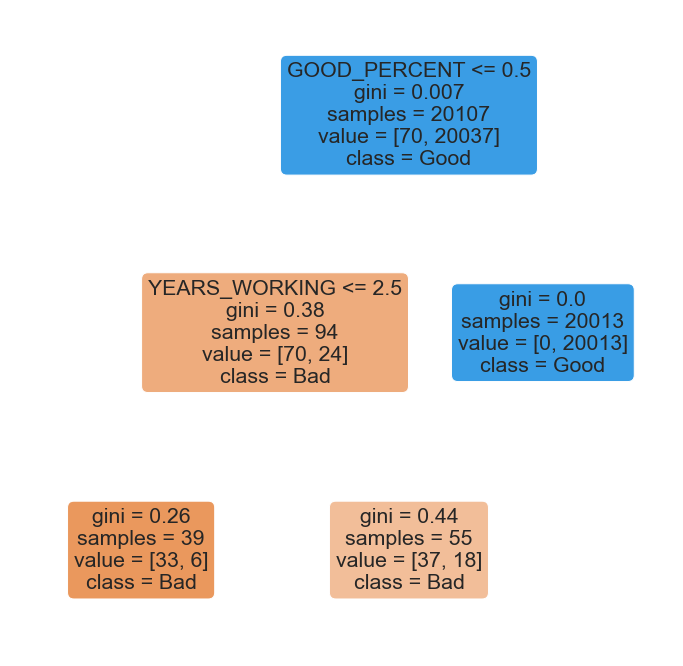

In [44]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train1.columns, 
          class_names=["Bad","Good"])